In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import matplotlib as mpl
mb = (0, 0.4470, 0.7410)
mr = (0.8500, 0.3250, 0.0980)
lmr = (0.9500, 0.7250, 0.5980)
lmb = (0.5, 0.7470, 0.8710)
# Set the font family to Times New Roman

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.weight'] = 'normal'

FirstTime = False

path = r'C:\Users\raklab\Pictures\Feedback_Data\20240711'
filename = 'run10.avi'

file_path = os.path.join(path, filename)

# Load the video
cap = cv2.VideoCapture(file_path)

# Get the number of frames in the video
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Get the width and height of the frames in the video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create an empty numpy array to store the video frames
video_frames = np.zeros((frame_count, frame_height), np.dtype('float'))

frame_accumulator = np.zeros((1000,frame_height, frame_width), np.dtype('float'))

print(frame_width, frame_height, frame_count)
      
t0 = time.time()

median_frame = np.load('median_crsyt.npz')['med']
# Read the frames from the video and store them in the numpy array
i = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:

        break
    sframe = np.sum(frame,axis=2)
    comp = np.min(sframe-median_frame, axis=1)

    video_frames[i] = comp
    frame_accumulator[i % 1000,:,:] = sframe
    i += 1

    if i % 1000 == 0:
        if FirstTime and i < 1001:
            median_frame = np.median(frame_accumulator, axis=0)
            np.savez('median_crsyt.npz', med = median_frame)
        print(f"Progress: {i}/{frame_count}")
# code_block
t1 = time.time()

total = t1-t0
print(total," sec")
cap.release()

164 396 10000
Progress: 1000/10000
Progress: 2000/10000
Progress: 3000/10000
Progress: 4000/10000
Progress: 5000/10000
Progress: 6000/10000
Progress: 7000/10000
Progress: 8000/10000
Progress: 9000/10000
Progress: 10000/10000
12.8473539352417  sec


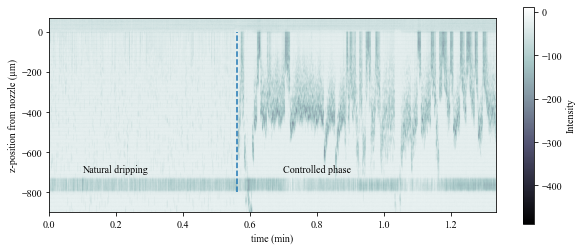

In [20]:
res = video_frames
frame_count = res.shape[0]
plt.figure(figsize=(10, 4))  # Example: 10 inches wide, 6 inches tall

numberOfPixels = 260
Length = 25400/4/10
fps = 62.5*2
extent = np.array([0, frame_count/fps/60, -900, res.shape[1]*Length/numberOfPixels-900])
plt.imshow(res.T,aspect=.0006,cmap='bone',extent=extent)
plt.ylabel('z-position from nozzle (µm)')
plt.xlabel('time (min)')
#plt.ylim([-1000,50])

plt.colorbar(label='Intensity')  # Add colorbar with label
plt.plot([0.56,0.56],[-800,0],'--')
# Add text labels
plt.text(.1, -700, 'Natural dripping', horizontalalignment='left')
#plt.text(11, -700, 'Synchronized dripping', horizontalalignment='left')
plt.text(.7, -700, 'Controlled phase', horizontalalignment='left')
#plt.savefig('Results/waterfall.pdf', format='pdf', dpi=300)
#plt.savefig('Results/waterfall.png', dpi=300)
plt.show()

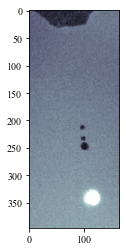

In [17]:
plt.imshow(sframe, cmap = 'bone')